# American Express - Default Prediction

## Introduction

In this section, we will group the American Express dataset in order to handle independent variables that will be used to predict the probability of default.

Let's begin by importing the libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Data/train_parquet.zip
!unzip /content/drive/MyDrive/Data/train_labels.csv.zip

Archive:  /content/drive/MyDrive/Data/train_parquet.zip
  inflating: train.parquet           
Archive:  /content/drive/MyDrive/Data/train_labels.csv.zip
  inflating: train_labels.csv        


In [ ]:
train = pd.read_parquet('/content/train.parquet')

In [ ]:
train_label = pd.read_csv('/content/train_labels.csv')

In [ ]:
print(train.shape)
print(train_label.shape)

(5531451, 190)
(458913, 2)


There are 5,531,451 records of 458,913 customers. In this case, around 200 variables are included in this dataset, but no further information is provided. 

      target
0  74.106639
1  25.893361


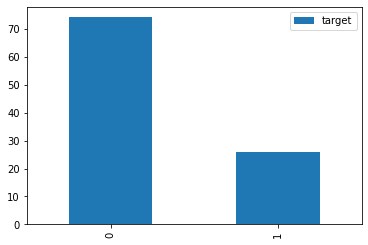

In [ ]:
print(pd.DataFrame(train_label['target'].value_counts()/len(train_label) * 100))
pd.DataFrame(train_label['target'].value_counts()/len(train_label) * 100).plot(kind='bar');

## Handling missing values

We have an imbalanced dataset; 25% of the customers are considered in default.

In [ ]:
Columns_NaNs = pd.DataFrame(train.isna().sum() / len(train) * 100)
Columns_NaNs.columns = ['prop_nans']
Columns_NaNs = Columns_NaNs[Columns_NaNs['prop_nans'] > 20]
Columns_NaNs

,prop_nans
D_42,85.694278
D_43,29.981211
D_46,21.905627
D_50,56.809723
D_53,73.842921
D_56,54.071581
S_9,53.035686
B_17,56.722874
D_73,98.990211
D_76,88.746226


In [ ]:
# Columns with more than 20% of missing values
NA_20 = list(Columns_NaNs.index)

In [ ]:
gc.collect()

2773

Columns with more than 20% of missing values will be removed.



In [ ]:
# Drop columns 20% NA's
train.drop(NA_20, axis=1, inplace=True)

# Drop column with the date
train.drop('S_2', axis = 1, inplace=True)

train.shape

(5531451, 168)

In [ ]:
cat_vars = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
cont_vars = [x for x in train.columns if x not in cat_vars]

In [ ]:
train_cat = train[['customer_ID'] + cat_vars].groupby(by = ['customer_ID'], axis = 0, as_index = False).mean().round(0)

In [ ]:
train_df1 = train[cont_vars].iloc[:, list(range(0,80))].groupby(by = ['customer_ID'], axis = 0, as_index = False).mean()

In [ ]:
train_df2 = train[cont_vars].iloc[:, [0] + list(range(80,157))].groupby(by = ['customer_ID'], axis = 0, as_index = False).mean()

In [ ]:
train_cat.head(2)

,customer_ID,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.0,2.0,1.0,0.0,5.0,0.0,2.0,0.0,0.0,-1.0,6.0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.0,2.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,-1.0,6.0


In [ ]:
train_df1.head(2)

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_44,...,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.230769,0.012007,1.005086,0.004509,0.113215,0.0,0.006456,0.0,...,0.0,-1.0,0.004974,0.384615,0.0,0.000000,0.004098,0.0,1.0,0.005079
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899820,7.153846,0.025654,0.991083,0.006246,0.120578,0.0,0.005663,0.0,...,0.0,-1.0,0.004212,0.000000,0.0,0.076923,0.004588,0.0,-1.0,0.004356


In [ ]:
train_df2.head(3)

,customer_ID,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,S_18,...,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,1.0,0.050968,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.005283,0.0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,1.0,0.017052,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,...,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.004218,0.0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,1.0,0.030714,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.005113,0.0


In [ ]:
df = pd.merge(pd.merge(train_label, train_df1,on='customer_ID', how = 'left'), train_df2, on='customer_ID', how = 'left')
df = pd.merge(df, train_cat, on='customer_ID', how = 'left')

In [ ]:
df.shape

(458913, 169)

In [ ]:
df.head(5)

,customer_ID,target,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.933824,0.230769,0.012007,1.005086,0.004509,0.113215,0.0,0.006456,...,2.0,1.0,0.0,5.0,0.0,2.0,0.0,0.0,-1.0,6.0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,0.899820,7.153846,0.025654,0.991083,0.006246,0.120578,0.0,0.005663,...,2.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,-1.0,6.0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,0.878454,0.000000,0.004386,0.815677,0.006621,NaN,0.0,0.005493,...,1.0,1.0,0.0,0.0,0.0,2.0,3.0,2.0,-1.0,6.0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,0.598969,1.538462,0.059876,0.955264,0.005665,0.247750,0.0,0.006423,...,2.0,1.0,0.0,5.0,0.0,2.0,3.0,0.0,-1.0,3.0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,0.891679,0.000000,0.005941,0.814543,0.004180,0.173102,0.0,0.005088,...,1.0,1.0,0.0,5.0,0.0,2.0,3.0,0.0,1.0,6.0


In [ ]:
df.to_parquet('/content/drive/MyDrive/amex_default_group.parquet')

In [ ]:
gc.collect()